## oasis infobyte

In [26]:

!pip install matplotlib seaborn

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [ ]:
import os
print(os.listdir())

In [7]:
df = pd.read_csv('car data.csv')

In [8]:
print(df.head())
print(df.info())
print(df.describe())


  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  3

In [9]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
# Fix data types if necessary
# Example: df['Year'] = df['Year'].astype(int)


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


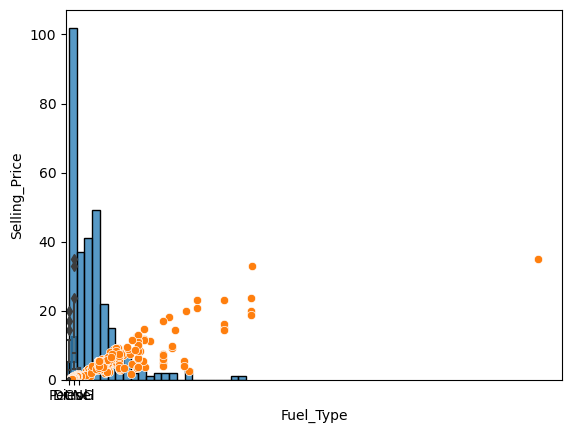

In [10]:
sns.histplot(df['Selling_Price'])
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
sns.scatterplot(x='Present_Price', y='Selling_Price', data=df)
plt.show()


In [11]:
df['Car_Age'] = 2025 - df['Year']  # Current year is 2025


In [15]:
print(df_encoded.columns)


Index(['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner',
       'Car_Age', 'Car_Name_Activa 3g', 'Car_Name_Activa 4g',
       'Car_Name_Bajaj  ct 100', 'Car_Name_Bajaj Avenger 150',
       ...
       'Car_Name_swift', 'Car_Name_sx4', 'Car_Name_verna',
       'Car_Name_vitara brezza', 'Car_Name_wagon r', 'Car_Name_xcent',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Selling_type_Individual',
       'Transmission_Manual'],
      dtype='object', length=107)


In [16]:
# Drop 'Car_Name' before encoding categorical variables
df_model = df.drop('Car_Name', axis=1)

# Encode categorical columns
df_encoded = pd.get_dummies(df_model, drop_first=True)

# Define X and y
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']

# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test)
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2:', r2_score(y_test, y_pred))


MAE: 1.4725457508180437
RMSE: 2.52450492300247
R^2: 0.7527233824219322


In [20]:
# Get feature names
feature_names = X.columns

# Get coefficients (importance for linear models)
importances = model.coef_

# Display together
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance}")


Year: 0.16501567288285685
Present_Price: 0.4371193433644765
Driven_kms: -1.0566941952132185e-05
Owner: 0.640143607799717
Car_Age: -0.16501567288285665
Fuel_Type_Diesel: 2.142391145501
Fuel_Type_Petrol: 0.6925161135076351
Selling_type_Individual: -1.302291062028823
Transmission_Manual: -1.5734245751073452


In [21]:
from sklearn.ensemble import RandomForestRegressor
tree_model = RandomForestRegressor()
tree_model.fit(X_train, y_train)
importances = tree_model.feature_importances_

# Display feature importances
for name, importance in zip(X.columns, importances):
    print(f"{name}: {importance}")


Year: 0.04171643922929122
Present_Price: 0.8990728011991848
Driven_kms: 0.014384272436846174
Owner: 1.1450380500663923e-05
Car_Age: 0.03550985898044473
Fuel_Type_Diesel: 0.0011946551079056132
Fuel_Type_Petrol: 0.0007302667826365384
Selling_type_Individual: 0.002979991400023895
Transmission_Manual: 0.004400264483166327


In [23]:
import joblib
joblib.dump(model, 'car_price_model.pkl')


['car_price_model.pkl']